In [ ]:
pip install python-mnist

In [ ]:
import time
import warnings
warnings.filterwarnings('ignore')
from mnist import MNIST #this is for loading emnist as input data

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
sns.set()

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
emnist = MNIST(r'drive/My Drive/emnist_data')
emnist.select_emnist('balanced')
images,labels = emnist.load_training()
testIM,testLAB = emnist.load_testing()

In [ ]:
n_images = np.array(images)
n_labels = np.array(labels)
testIM = np.array(testIM)
testLAB = np.array(testLAB)

In [ ]:
train_images.shape #(60,000*785)
test_images.shape #(10000,785)
train_X= train_images
test_X= test_images
train_Y= n_labels
test_Y = testLAB

# Visualizing the dataset

In [ ]:
n_images1 = n_images[9000].reshape(28,28)

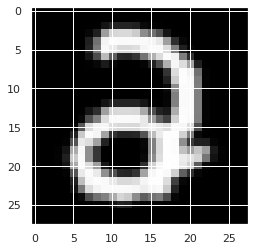

In [ ]:
plt.imshow(n_images1,cmap='gist_gray')
plt.show()

In [ ]:
n_images[0][455]

207

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(n_images)
train_images = scaler.transform(n_images)

In [ ]:
train_images[0][455]

0.8117647058823529

In [ ]:
scaler.fit(testIM)
test_images = scaler.transform(testIM)

In [ ]:
testIM[0][567]

19

In [ ]:
test_images[0][567]

0.07450980392156863

In [ ]:
import matplotlib.pyplot as plt
from PIL import ImageFilter,Image
import numpy as np
import cv2

In [ ]:
def normalize_to_emnist(im):
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L',(28,28),(255))


    if width > height: #check which dimension is bigger
        #Width is bigger. Width becomes 20 pixels.
        nheight = int(round((28.0/width*height),0)) #resize height according to ratio width
        if (nheight == 0): #rare case but minimum is 1 pixel
            nheight = 1  
        # resize and sharpen
        img = im.resize((28,nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight)/2),0)) #caculate horizontal pozition
        newImage.paste(img, (0,wtop)) #paste resized image on white canvas
    else:
    #Height is bigger. Heigth becomes 20 pixels. 
        nwidth = int(round((28.0/height*width),0)) #resize width according to ratio height
        if (nwidth == 0): #rare case but minimum is 1 pixel
            nwidth = 1
     # resize and sharpen
        img = im.resize((nwidth,28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth)/2),0)) #caculate vertical pozition
        newImage.paste(img, (wleft,0)) #paste resize

    tv = list(newImage.getdata())
    tva = [ (255-x)*1.0/255.0 for x in tv]


    for i in range(len(tva)):
        if tva[i]<=0.45:
            tva[i]=0.0
    n_image = np.array(tva)

    return n_image

# Adding Second Dataset

In [ ]:
from PIL import ImageFilter,Image
import helper

In [ ]:
count=47
for k in range(1,37):
    for i in range(1,101):
        try:
            im = Image.open('drive/My Drive/Hindi_Data/Hin_DATA/a{}- ({}).png'.format(k,i)).convert('LA')
            print("done")
        except:
            print("error")
            break
        n_image = normalize_to_emnist(im)
        train_images = np.append(train_images,[n_image],axis=0)
        test_images = np.append(test_images,[n_image],axis=0)
        n_labels = np.append(n_labels,[count])
        testLAB = np.append(testLAB,[count])
    count+=1

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
print(len(train_images))
print(len(test_images))
print(len(n_labels))
print(len(testLAB))

116307
22307
116307
22307


In [ ]:
%store n_images
%store n_labels
%store testIM 
%store testLAB

Stored 'n_images' (ndarray)
Stored 'n_labels' (ndarray)
Stored 'testIM' (ndarray)
Stored 'testLAB' (ndarray)


In [ ]:
n_labels[116306]

82

In [ ]:
from sklearn.utils import shuffle

Data after scaler


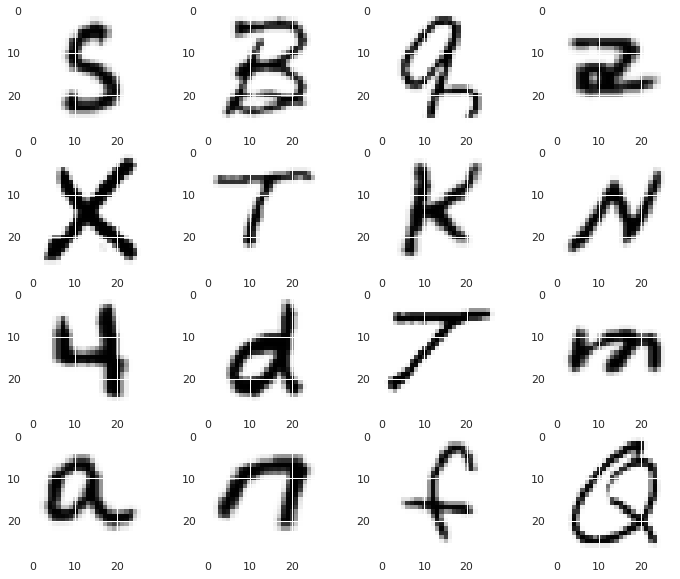

In [ ]:
print("Data after scaler")
X_shuffle = shuffle(n_images)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
X_train = train_images
X_test = test_images
y_train = n_labels
y_test = testLAB

In [ ]:
train_images.shape #(60,000*785)
test_images.shape #(10000,785)
train_X= train_images
test_X= test_images
train_Y= n_labels
test_Y = testLAB

In [ ]:


# Convert the images into 3 channels
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape



((116307, 784, 3), (22307, 784, 3))

In [ ]:


# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape



((116307, 28, 28, 3), (22307, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in test_X])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((116307, 32, 32, 3), (22307, 32, 32, 3))

In [ ]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# Converting Labels to one hot encoded format
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X,y)

In [ ]:
# split raw dataset into 80% for training and 20% for validating
train, validate = train_test_split(train_X, test_size = 0.2, random_state = 42)

# split training dataset into 90% for training and 10% for predicting
train, test = train_test_split(train_X, test_size = 0.1, random_state = 42)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
# model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.3))


model.add(Conv2D(filters=512, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units=784, activation='relu'))
model.add(Dense(units=784, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(83, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 3, 256)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_Y, epochs=20, batch_size=512, verbose=1, \
                    validation_data=validate)

In [ ]:
# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=784, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(83, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               2459408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, \
                    validation_data=(X_test, y_test))

Train on 116307 samples, validate on 22307 samples
Epoch 1/20
116307/116307 [==============================] - 419s 4ms/step - loss: 1.0715 - accuracy: 0.6882 - val_loss: 0.6783 - val_accuracy: 0.7953
Epoch 2/20
116307/116307 [==============================] - 416s 4ms/step - loss: 0.5142 - accuracy: 0.8295 - val_loss: 0.4571 - val_accuracy: 0.8551
Epoch 3/20
116307/116307 [==============================] - 413s 4ms/step - loss: 0.4235 - accuracy: 0.8548 - val_loss: 0.3796 - val_accuracy: 0.8748
Epoch 4/20
116307/116307 [==============================] - 416s 4ms/step - loss: 0.3764 - accuracy: 0.8670 - val_loss: 0.3339 - val_accuracy: 0.8877
Epoch 5/20
116307/116307 [==============================] - 418s 4ms/step - loss: 0.3421 - accuracy: 0.8775 - val_loss: 0.3130 - val_accuracy: 0.8930
Epoch 6/20
116307/116307 [==============================] - 420s 4ms/step - loss: 0.3169 - accuracy: 0.8838 - val_loss: 0.2974 - val_accuracy: 0.8986
Epoch 7/20
116307/116307 [=======================

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

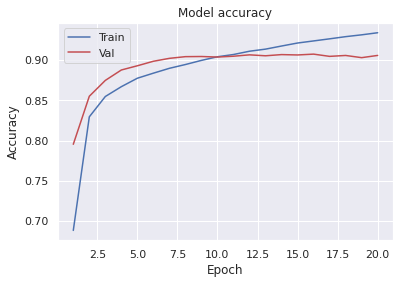

In [ ]:
Accuracy curve
plotgraph(epochs, acc, val_acc)

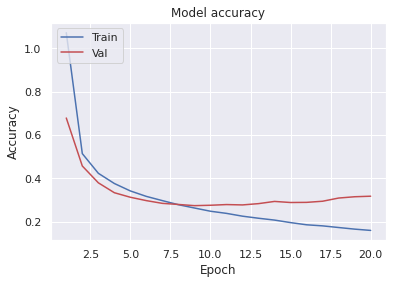

In [ ]:
loss curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.31784786479802196
Test accuracy: 0.9058591723442078


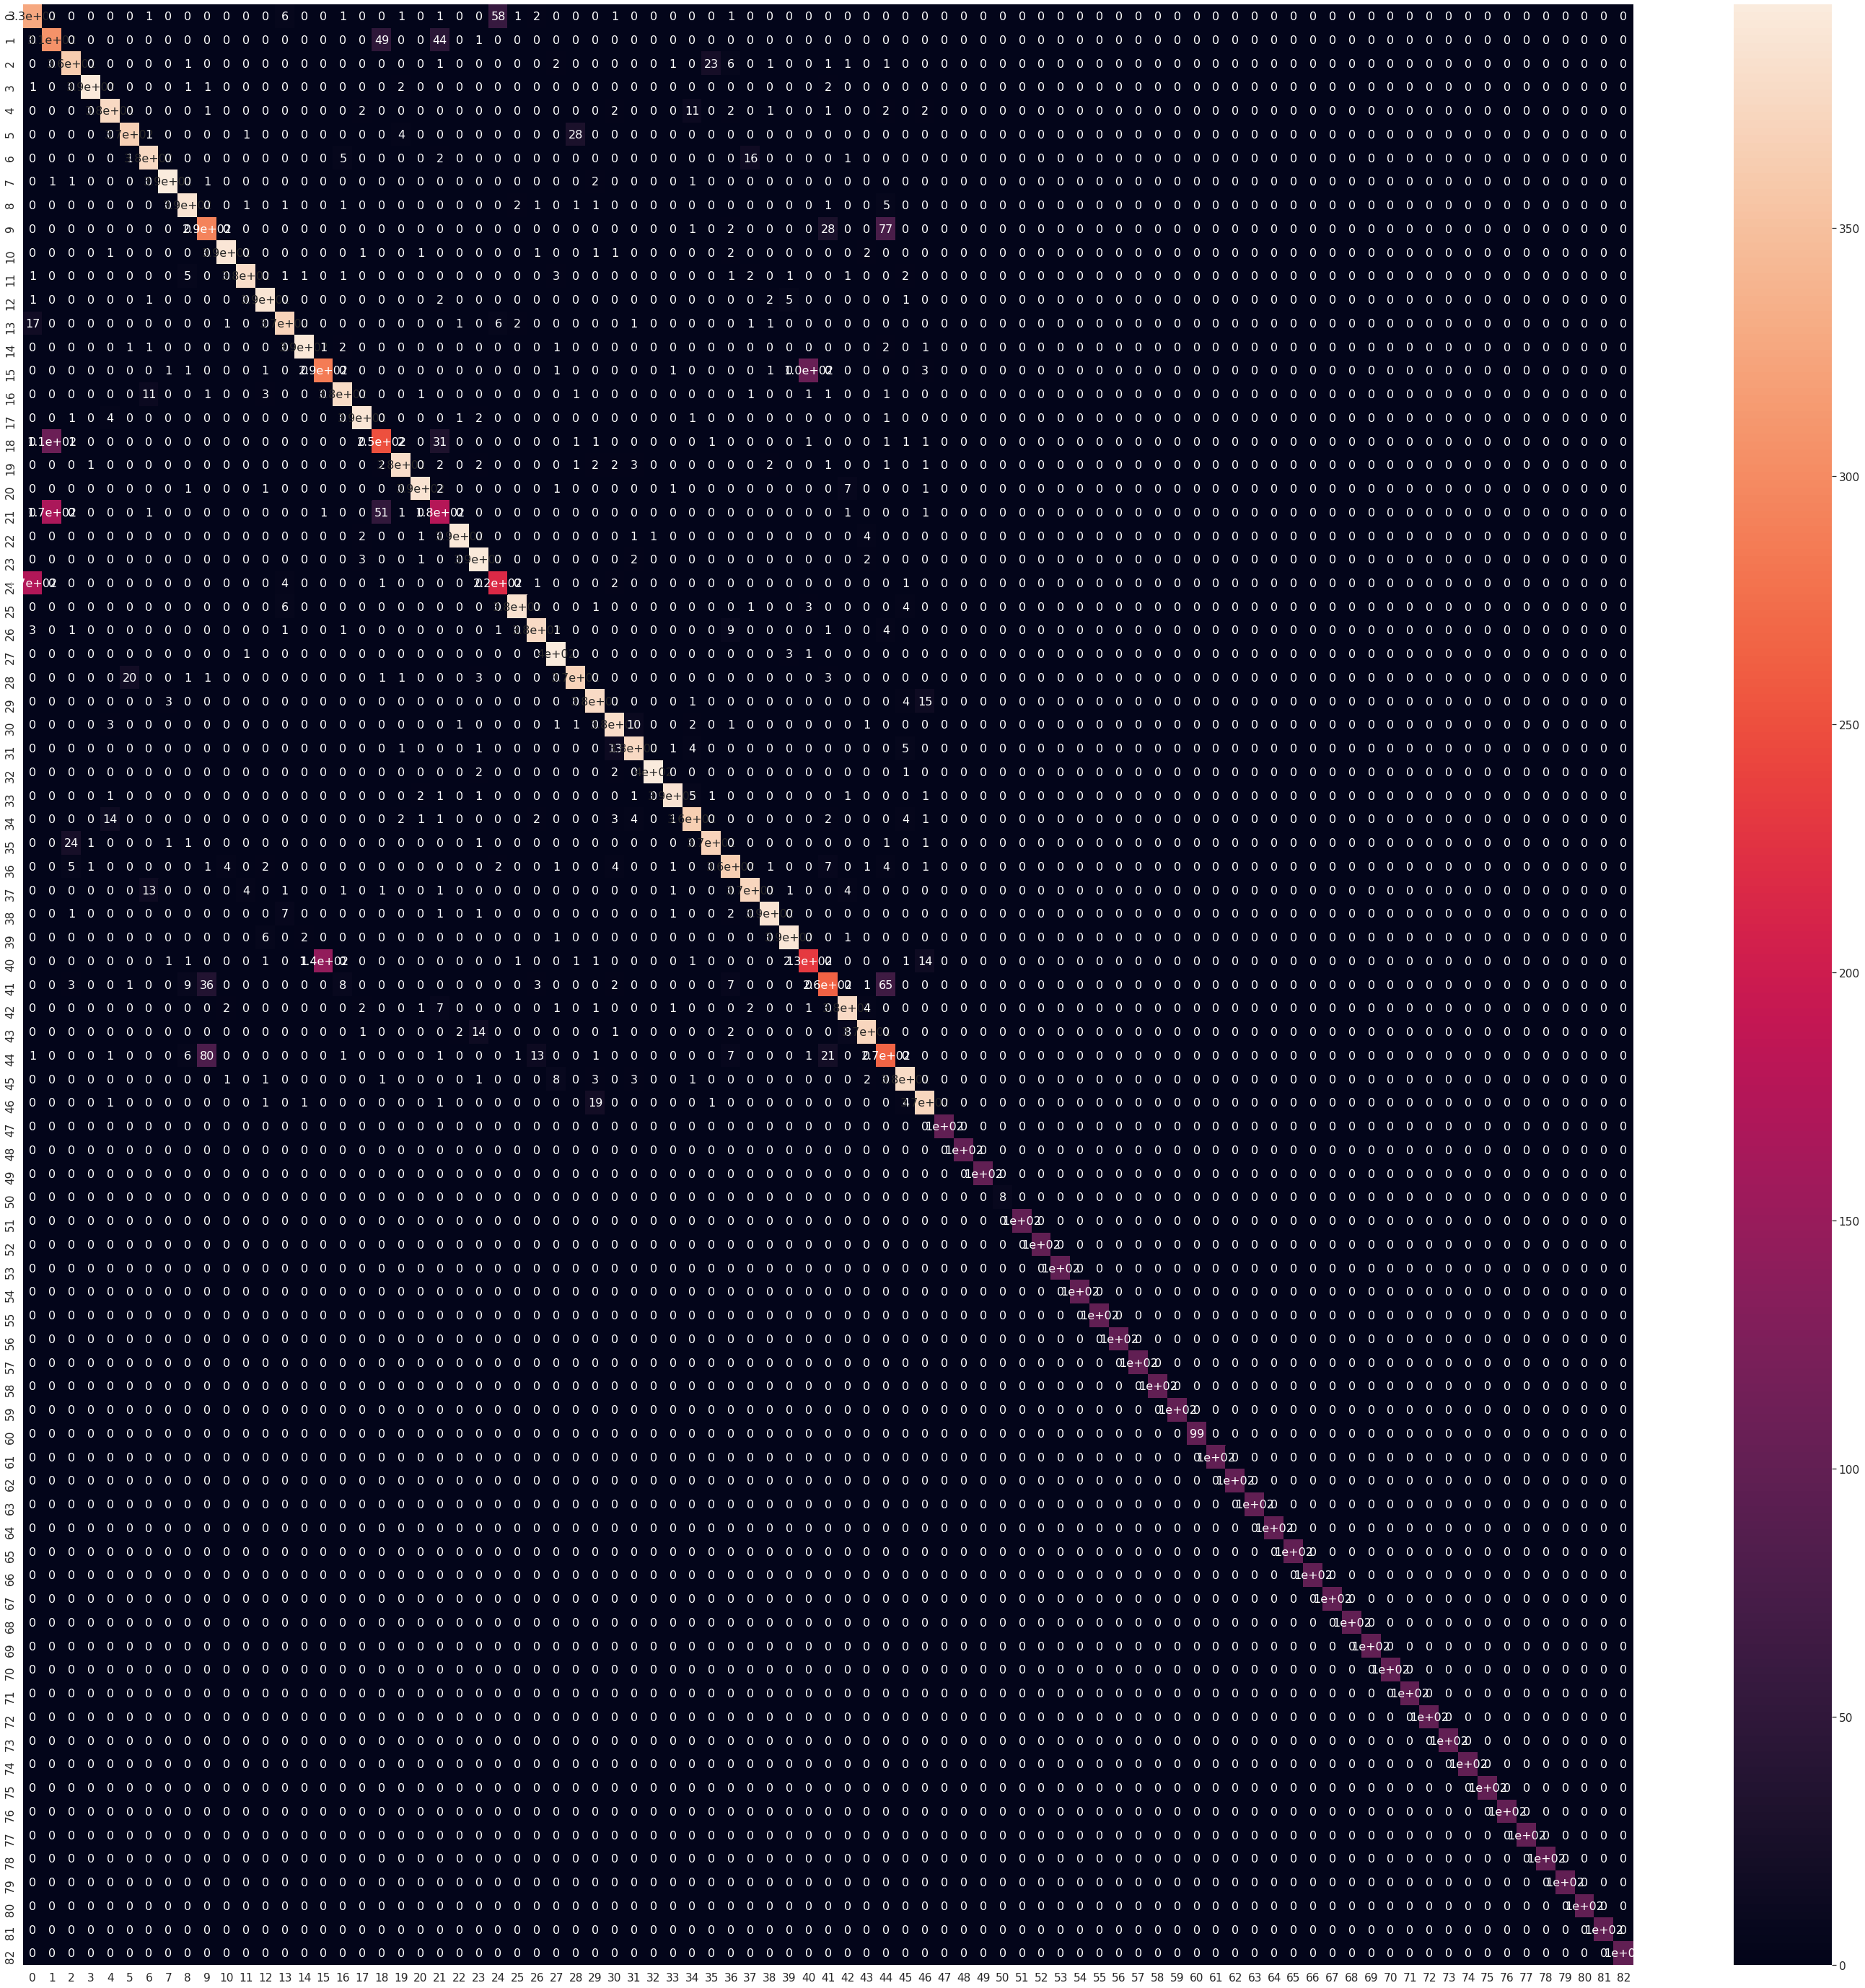

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(83),
                  range(83))
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
# model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(Conv2D(filters=256, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.3))


model.add(Conv2D(filters=512, kernel_size=(3,3) , padding = 'same', activation='relu'))
# model.add(Conv2D(filters=512, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units=784, activation='relu'))
model.add(Dense(units=784, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(83, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 3, 256)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=512, verbose=1, \
                    validation_data=(X_test, y_test))

Train on 116307 samples, validate on 22307 samples
Epoch 1/15
116307/116307 [==============================] - 978s 8ms/step - loss: 1.3449 - accuracy: 0.6142 - val_loss: 0.8356 - val_accuracy: 0.7475
Epoch 2/15
116307/116307 [==============================] - 979s 8ms/step - loss: 0.5021 - accuracy: 0.8282 - val_loss: 0.5199 - val_accuracy: 0.8291
Epoch 3/15
116307/116307 [==============================] - 980s 8ms/step - loss: 0.4027 - accuracy: 0.8574 - val_loss: 0.3963 - val_accuracy: 0.8635
Epoch 4/15
116307/116307 [==============================] - 977s 8ms/step - loss: 0.3516 - accuracy: 0.8724 - val_loss: 0.3495 - val_accuracy: 0.8759
Epoch 5/15
116307/116307 [==============================] - 978s 8ms/step - loss: 0.3220 - accuracy: 0.8816 - val_loss: 0.3290 - val_accuracy: 0.8856
Epoch 6/15
116307/116307 [==============================] - 973s 8ms/step - loss: 0.2993 - accuracy: 0.8886 - val_loss: 0.2913 - val_accuracy: 0.8976
Epoch 7/15
116307/116307 [=======================

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

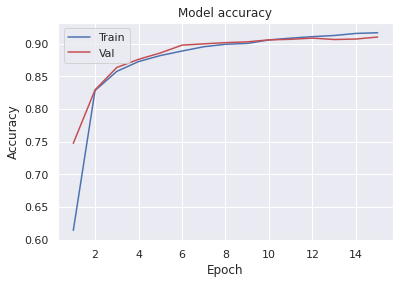

In [ ]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

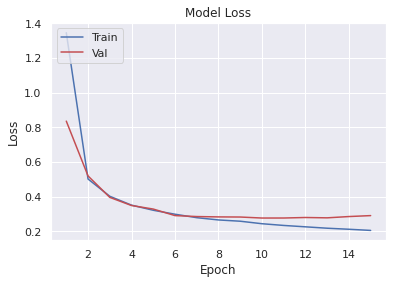

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29128905523003296
Test accuracy: 0.9100282192230225


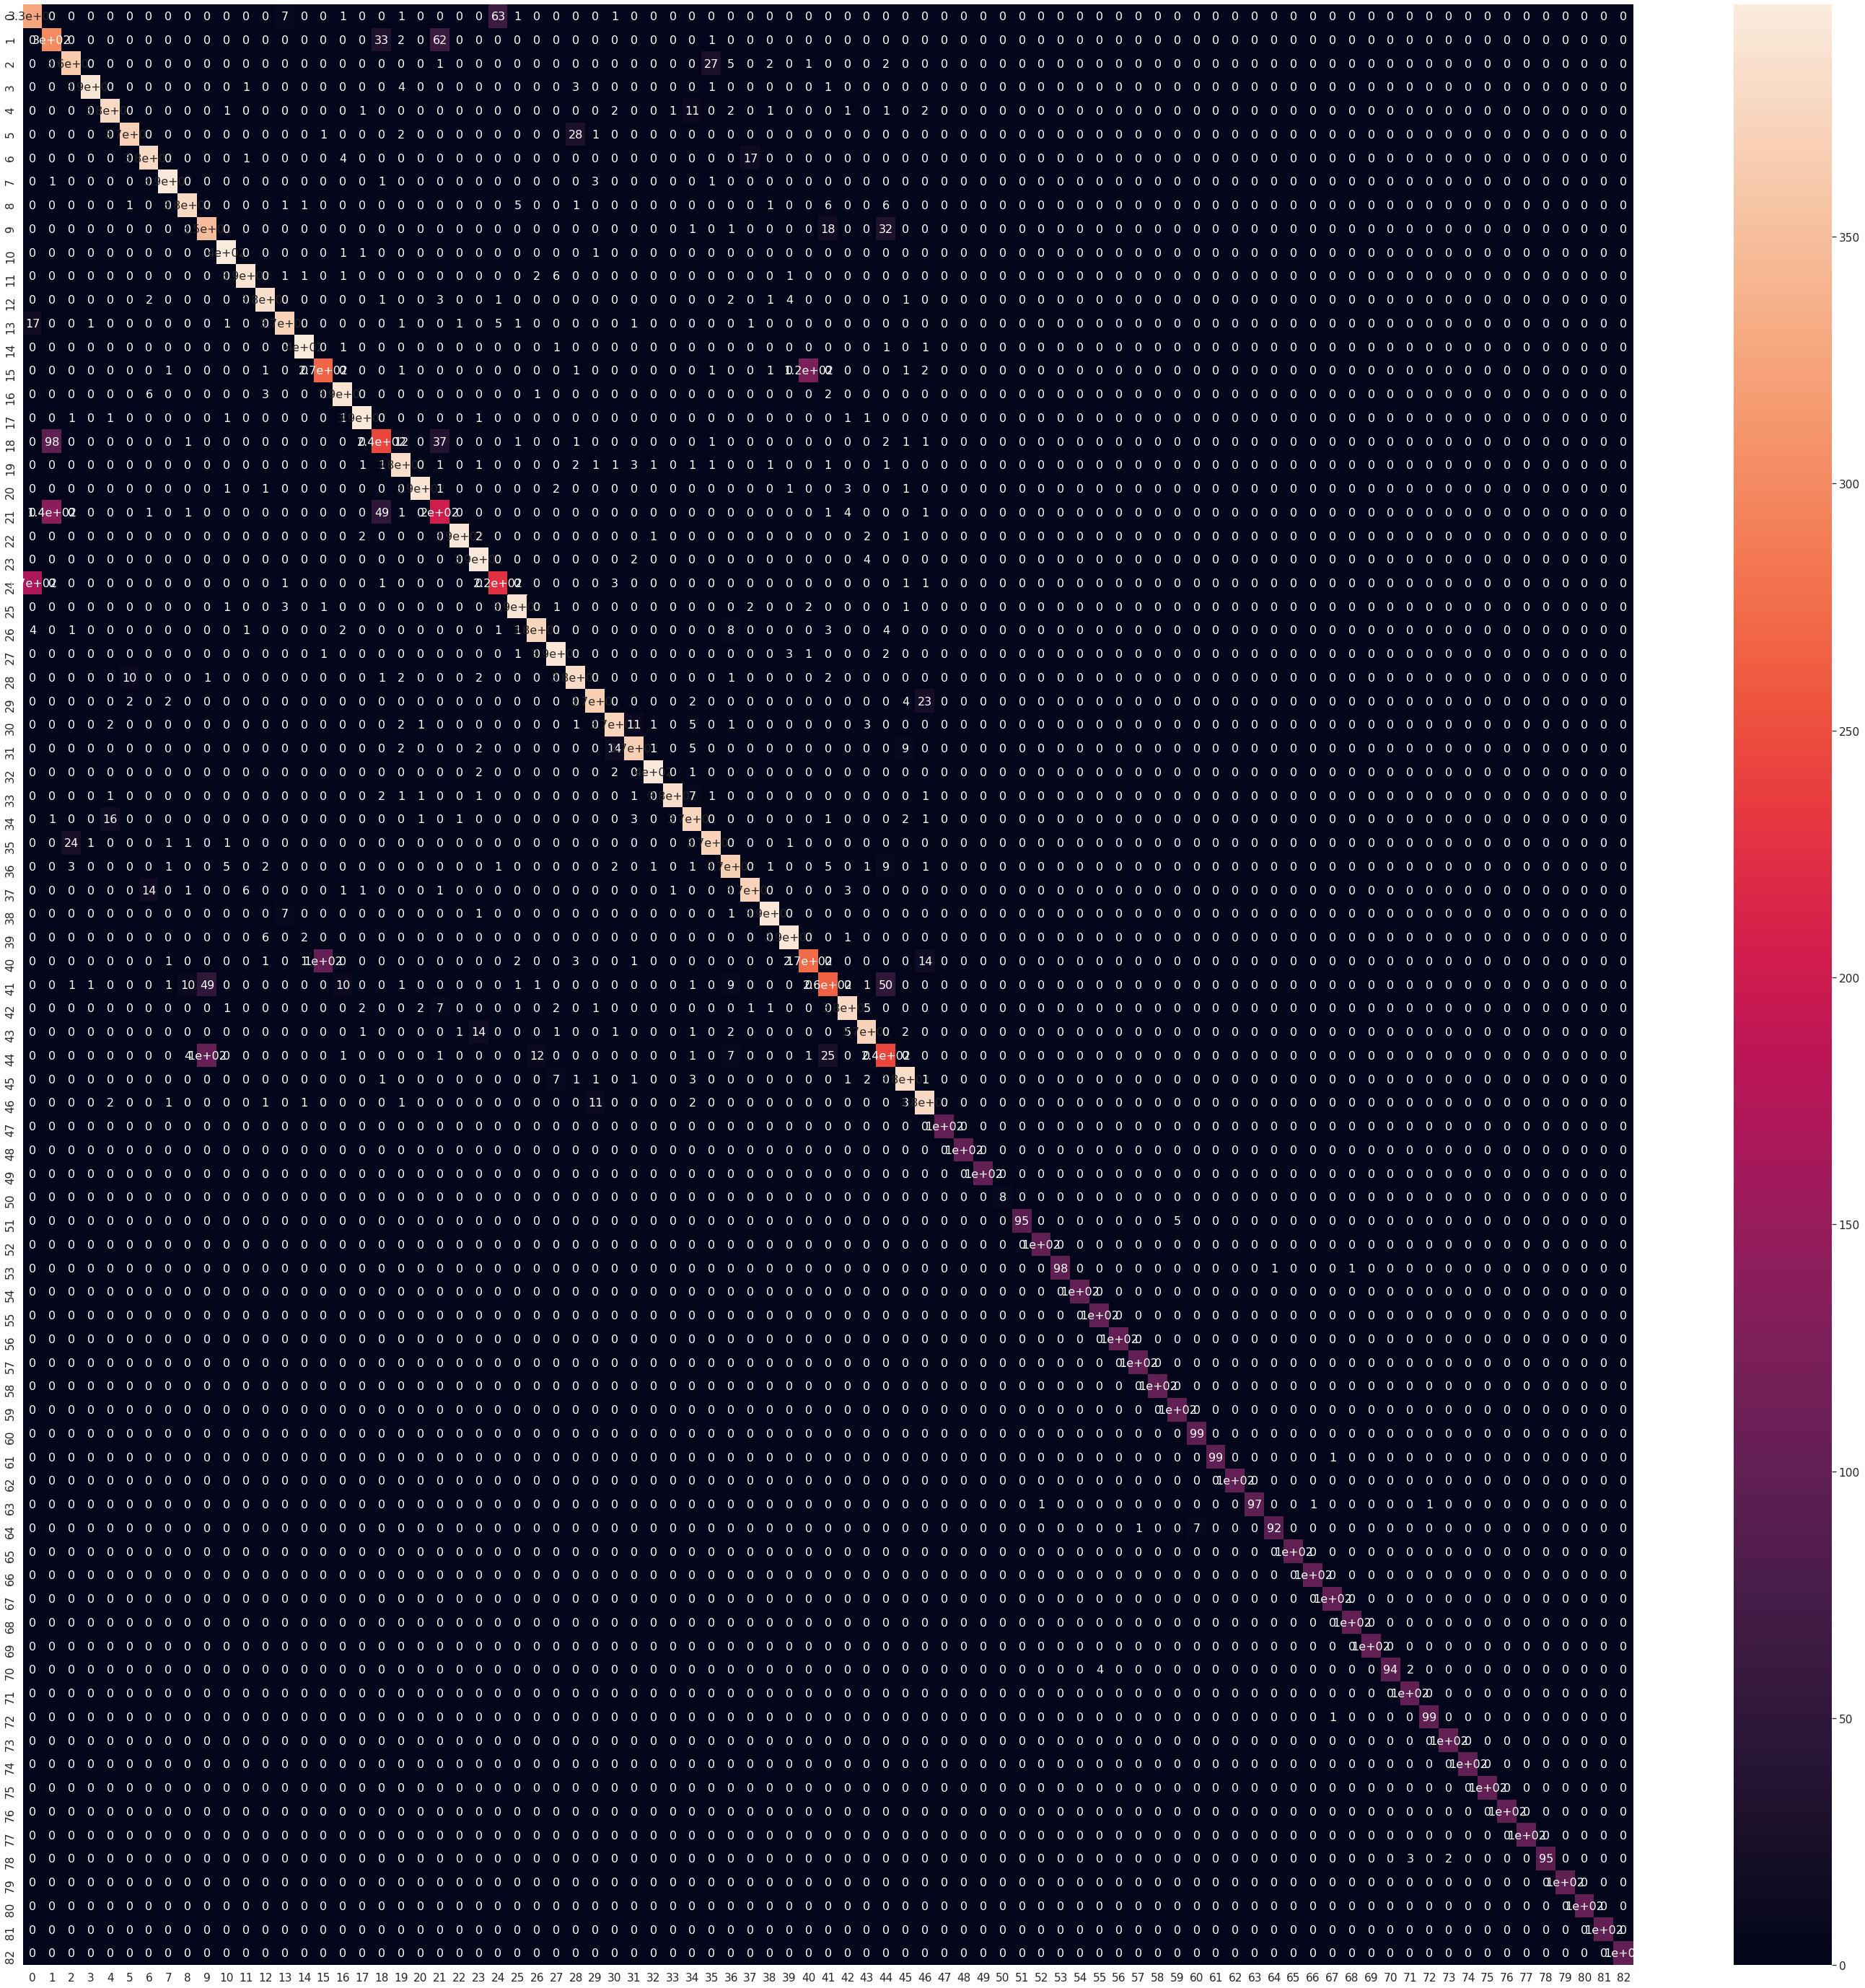

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(83),
                  range(83))
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [ ]:
from keras.models import Sequential, load_model

In [ ]:
# saving the model
save_dir = "/content/"
model_name = 'keras_Hindi_Emnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/keras_Hindi_Emnist.h5 



0  classified correctly
1  classified incorrectly


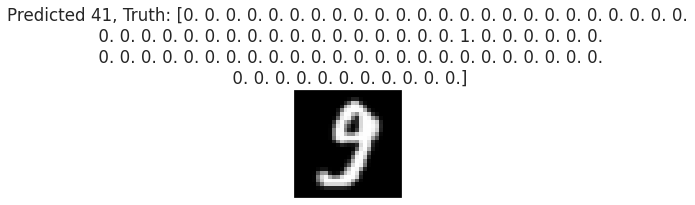

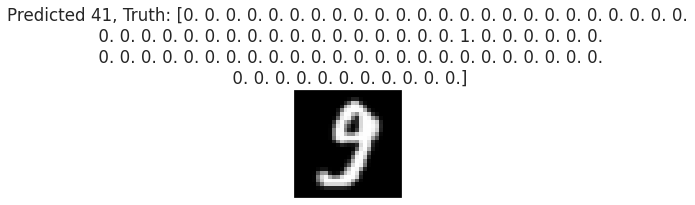

In [ ]:
# load the model and create predictions on the test set
mnist_model = load_model("keras_Hindi_Emnist.h5")
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

# Adding 16 layers

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=784,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=784,activation="relu"))
model.add(Dense(83, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, \
                    validation_data=(X_test, y_test))

Train on 116307 samples, validate on 22307 samples
Epoch 1/10
116307/116307 [==============================] - 934s 8ms/step - loss: 1.4123 - accuracy: 0.6048 - val_loss: 0.7317 - val_accuracy: 0.7826
Epoch 2/10
116307/116307 [==============================] - 923s 8ms/step - loss: 0.5362 - accuracy: 0.8197 - val_loss: 0.4569 - val_accuracy: 0.8523
Epoch 3/10
116307/116307 [==============================] - 925s 8ms/step - loss: 0.4359 - accuracy: 0.8490 - val_loss: 0.3801 - val_accuracy: 0.8730
Epoch 4/10
116307/116307 [==============================] - 926s 8ms/step - loss: 0.3887 - accuracy: 0.8620 - val_loss: 0.3400 - val_accuracy: 0.8851
Epoch 5/10
116307/116307 [==============================] - 925s 8ms/step - loss: 0.3586 - accuracy: 0.8710 - val_loss: 0.2972 - val_accuracy: 0.8959
Epoch 6/10
116307/116307 [==============================] - 921s 8ms/step - loss: 0.3363 - accuracy: 0.8775 - val_loss: 0.2869 - val_accuracy: 0.9008
Epoch 7/10
116307/116307 [=======================

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

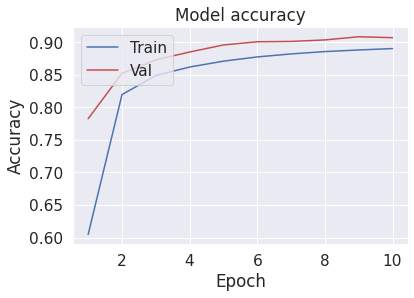

In [ ]:
Accuracy curve
plotgraph(epochs, acc, val_acc)

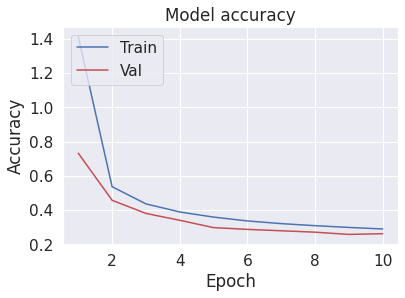

In [ ]:
loss curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

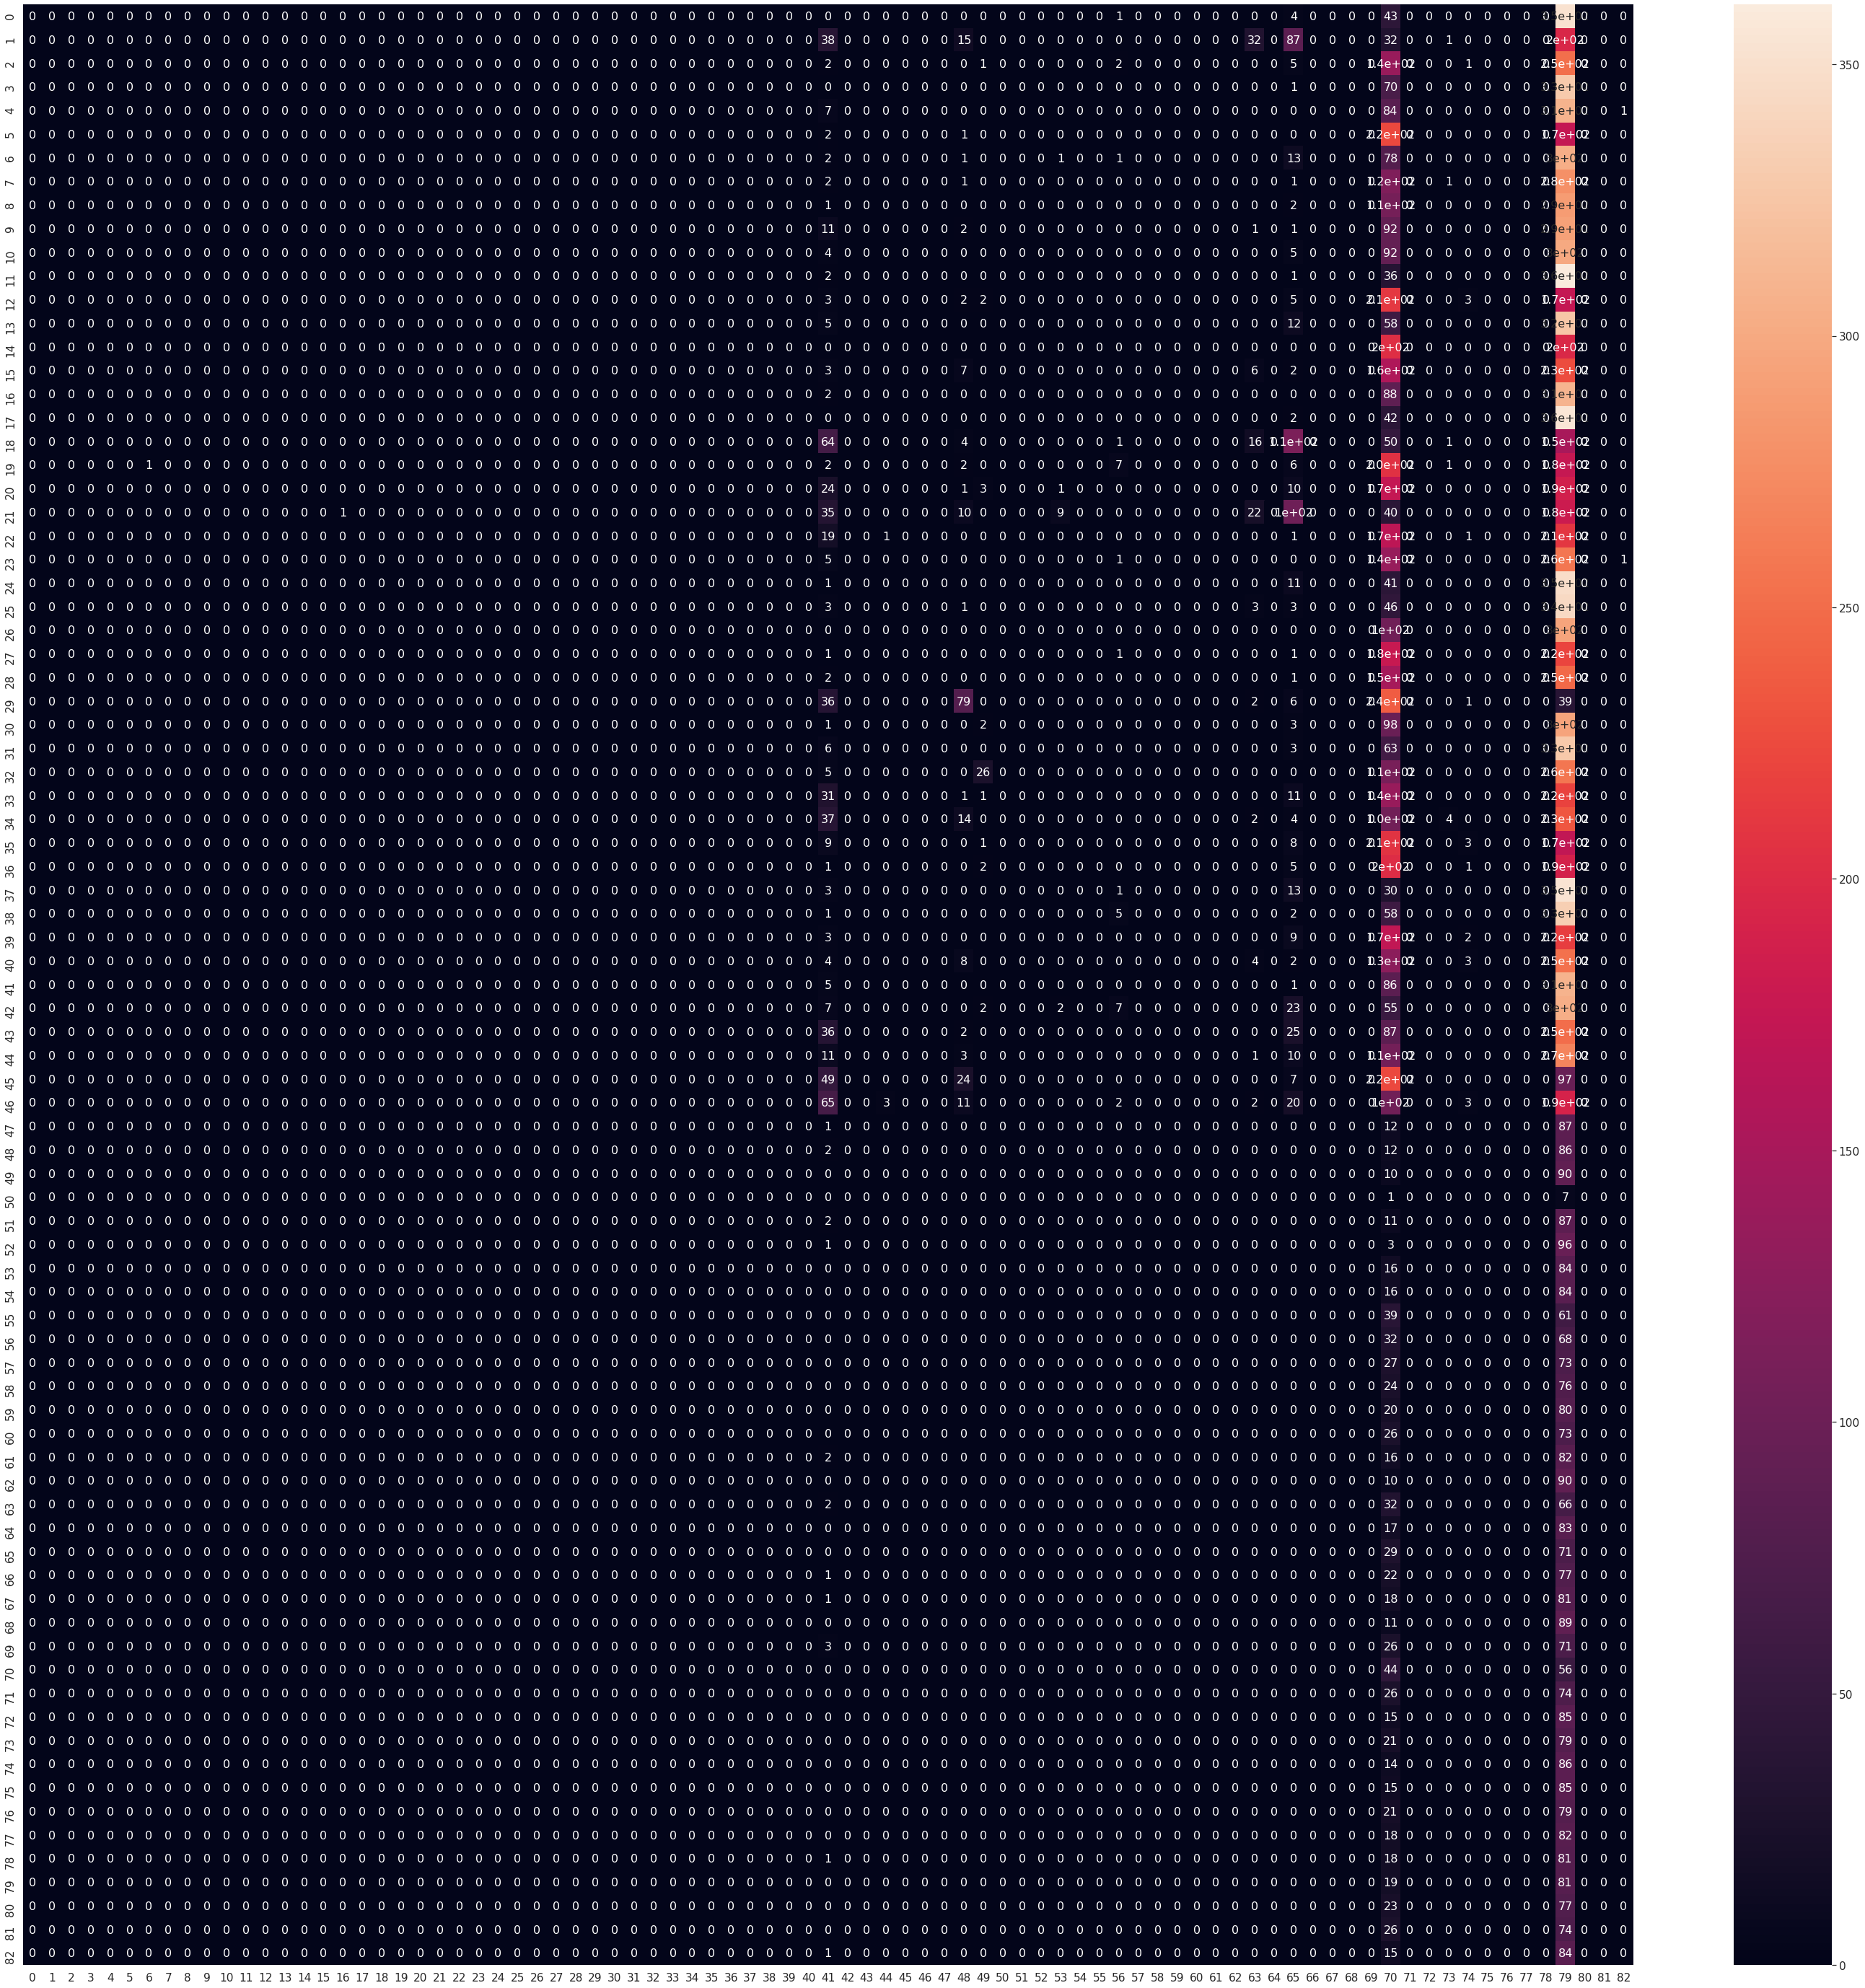

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(83),
                  range(83))
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

#Adding 19 layers

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=784,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=784,activation="relu"))
model.add(Dense(83, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 14, 14, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, \
                    validation_data=(X_test, y_test))

Train on 116307 samples, validate on 22307 samples
Epoch 1/10
116307/116307 [==============================] - 1308s 11ms/step - loss: 2.4516 - accuracy: 0.3345 - val_loss: 1.0939 - val_accuracy: 0.6724
Epoch 2/10
116307/116307 [==============================] - 1323s 11ms/step - loss: 0.7535 - accuracy: 0.7589 - val_loss: 0.8650 - val_accuracy: 0.7349
Epoch 3/10
116307/116307 [==============================] - 1316s 11ms/step - loss: 0.5859 - accuracy: 0.8067 - val_loss: 0.7419 - val_accuracy: 0.7657
Epoch 4/10
116307/116307 [==============================] - 1306s 11ms/step - loss: 0.5086 - accuracy: 0.8288 - val_loss: 0.6237 - val_accuracy: 0.8022
Epoch 5/10
116307/116307 [==============================] - 1329s 11ms/step - loss: 0.4661 - accuracy: 0.8402 - val_loss: 0.5760 - val_accuracy: 0.8105
Epoch 6/10
116307/116307 [==============================] - 1308s 11ms/step - loss: 0.4257 - accuracy: 0.8525 - val_loss: 0.5058 - val_accuracy: 0.8351
Epoch 7/10
116307/116307 [===========

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

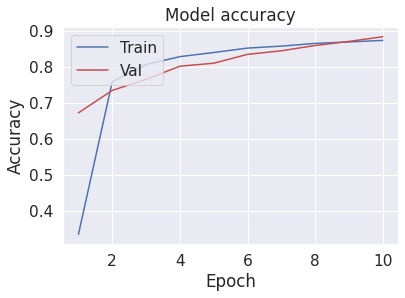

In [ ]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

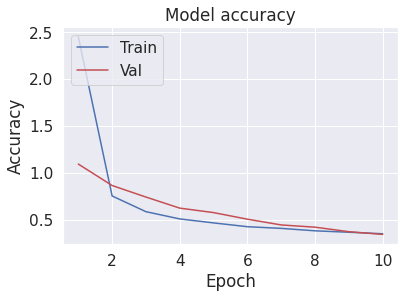

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3433605249724491
Test accuracy: 0.8840722441673279


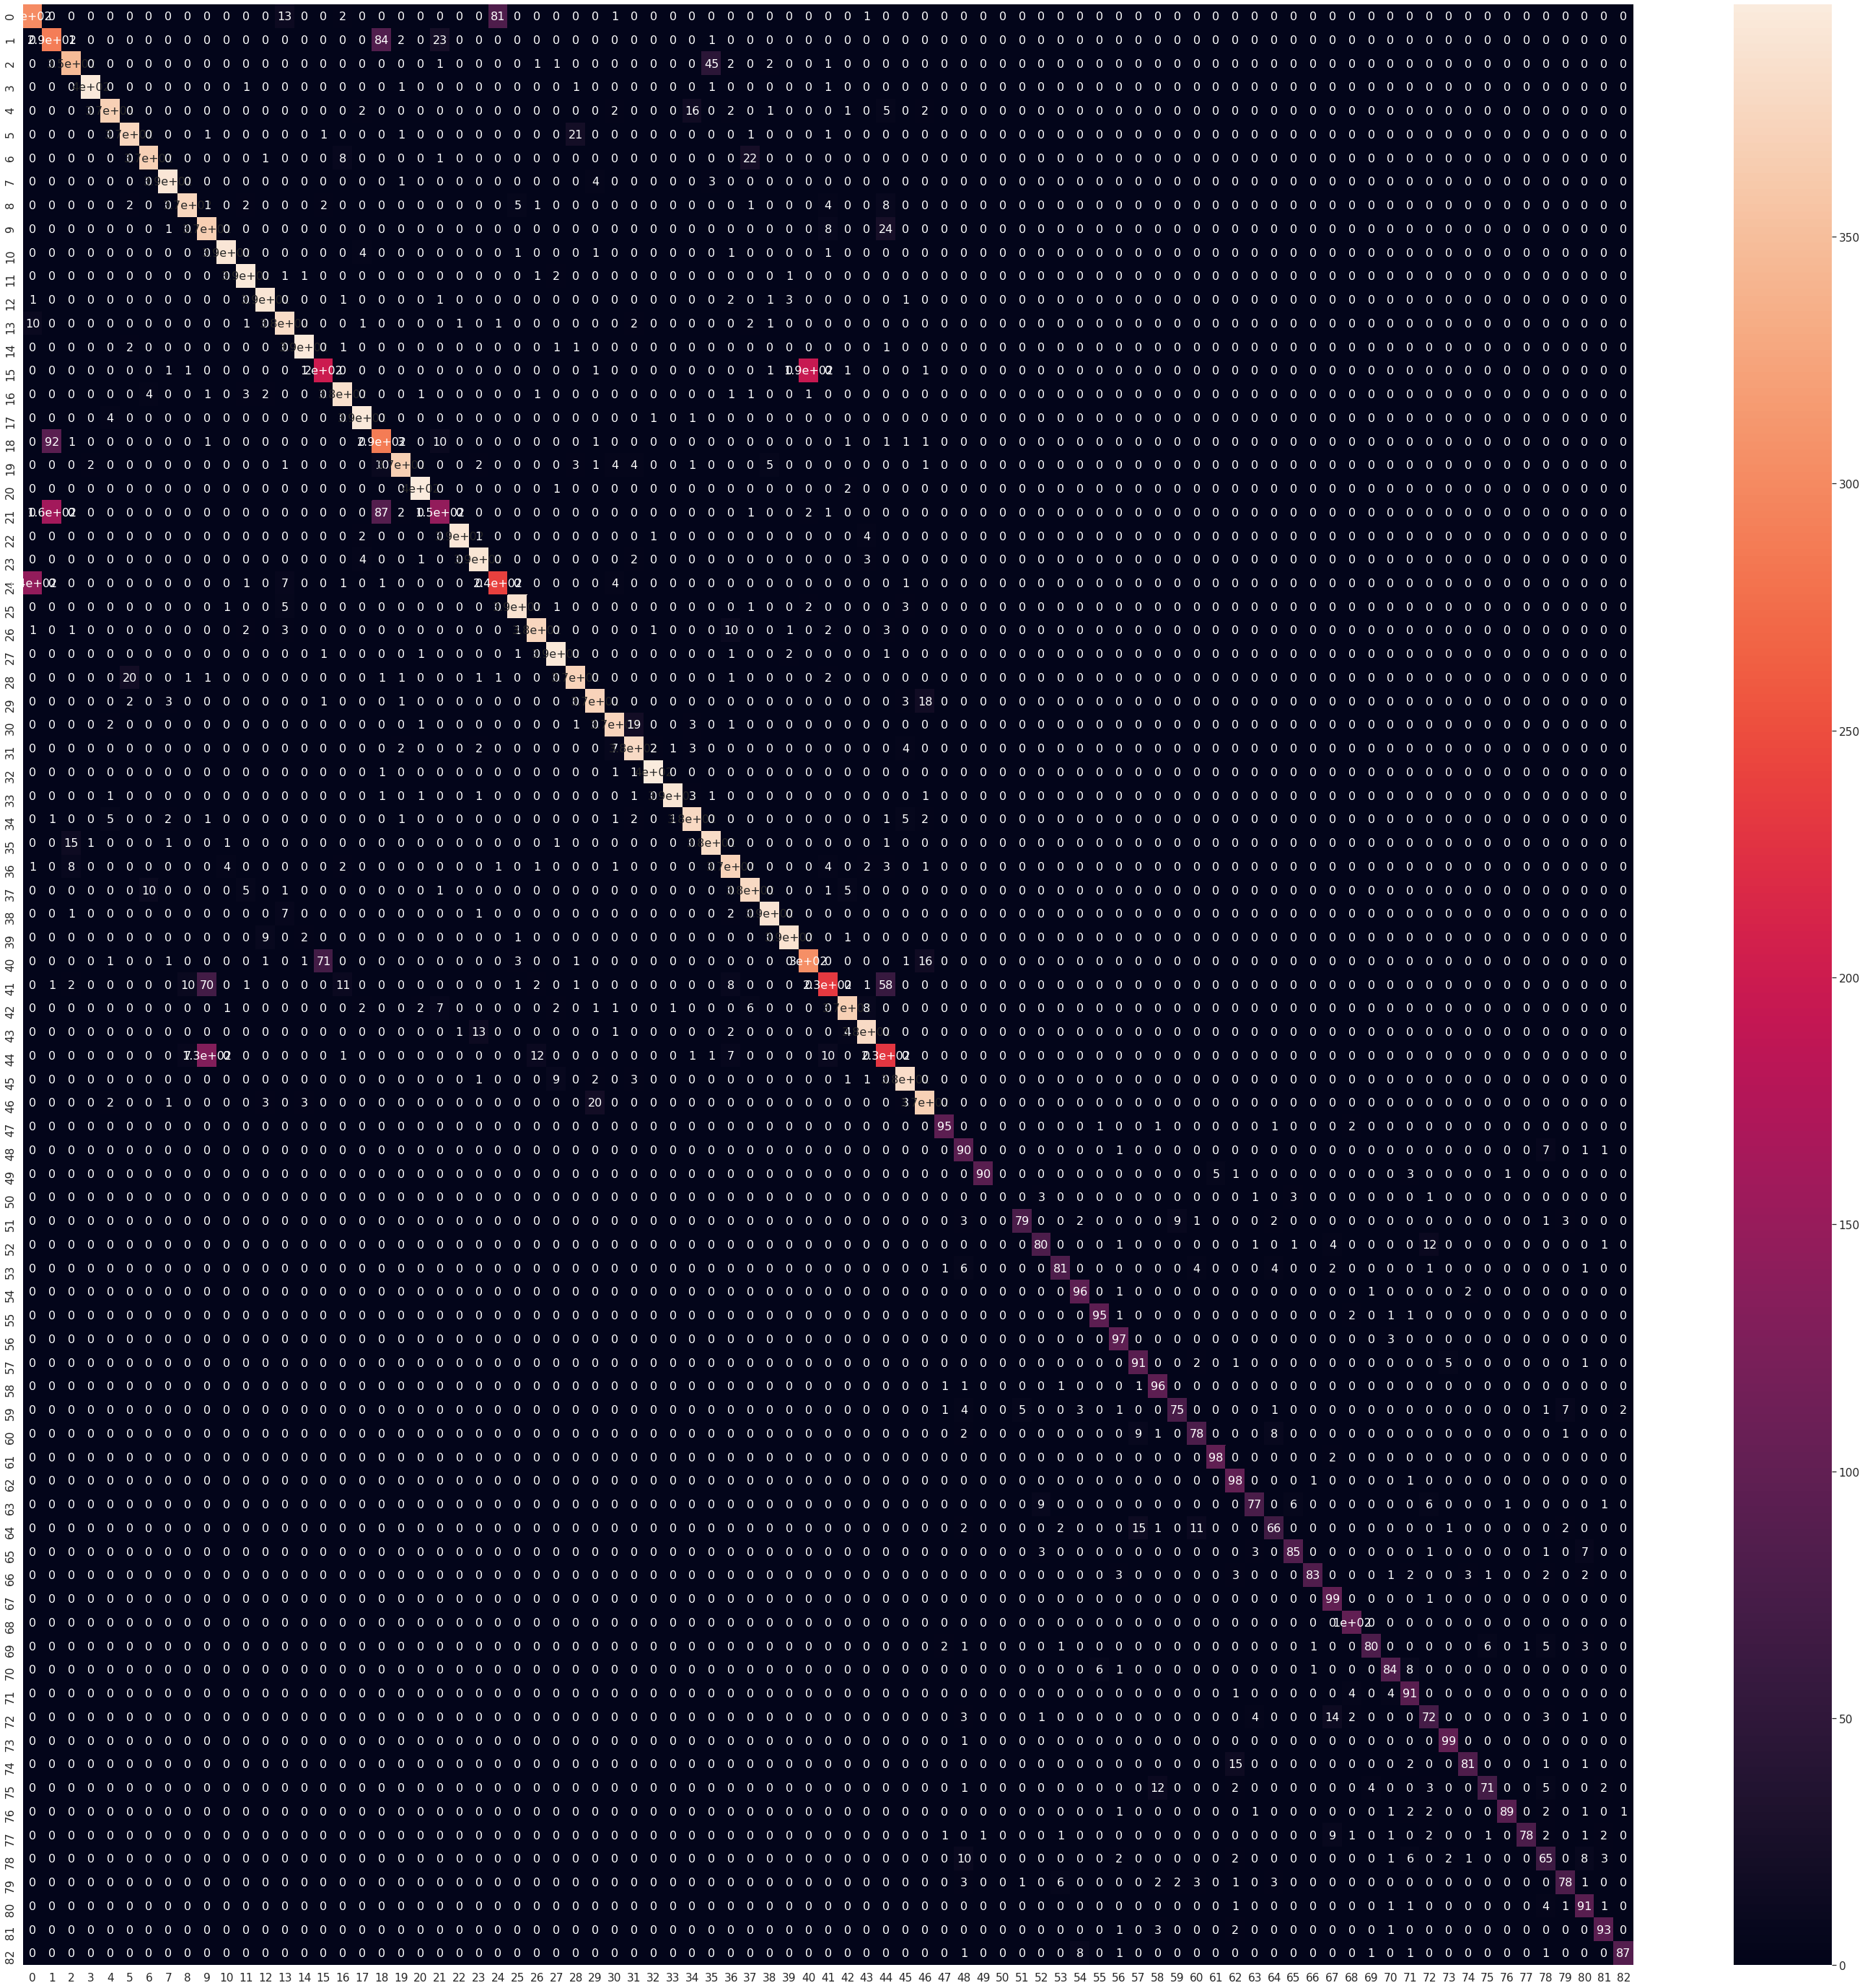

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(83),
                  range(83))
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

New 16 Layers

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=784,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=784,activation="relu"))
model.add(Dense(83, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 128)      

In [ ]:
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=512, verbose=1, \
                    validation_data=(X_test, y_test))

Train on 116307 samples, validate on 22307 samples
Epoch 1/15
116307/116307 [==============================] - 1356s 12ms/step - loss: 2.4160 - accuracy: 0.3221 - val_loss: 1.1898 - val_accuracy: 0.6449
Epoch 2/15
116307/116307 [==============================] - 1352s 12ms/step - loss: 0.6730 - accuracy: 0.7751 - val_loss: 0.7777 - val_accuracy: 0.7441
Epoch 3/15
116307/116307 [==============================] - 1352s 12ms/step - loss: 0.5011 - accuracy: 0.8265 - val_loss: 0.5984 - val_accuracy: 0.8038
Epoch 4/15
116307/116307 [==============================] - 1358s 12ms/step - loss: 0.4286 - accuracy: 0.8488 - val_loss: 0.4668 - val_accuracy: 0.8390
Epoch 5/15
116307/116307 [==============================] - 1356s 12ms/step - loss: 0.3847 - accuracy: 0.8622 - val_loss: 0.3917 - val_accuracy: 0.8620
Epoch 6/15
116307/116307 [==============================] - 1354s 12ms/step - loss: 0.3547 - accuracy: 0.8713 - val_loss: 0.3814 - val_accuracy: 0.8686
Epoch 7/15
116307/116307 [===========

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_accuracy, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_accuracy, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

NameError: ignored

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

NameError: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.29430781467662204
Test accuracy: 0.8995382785797119


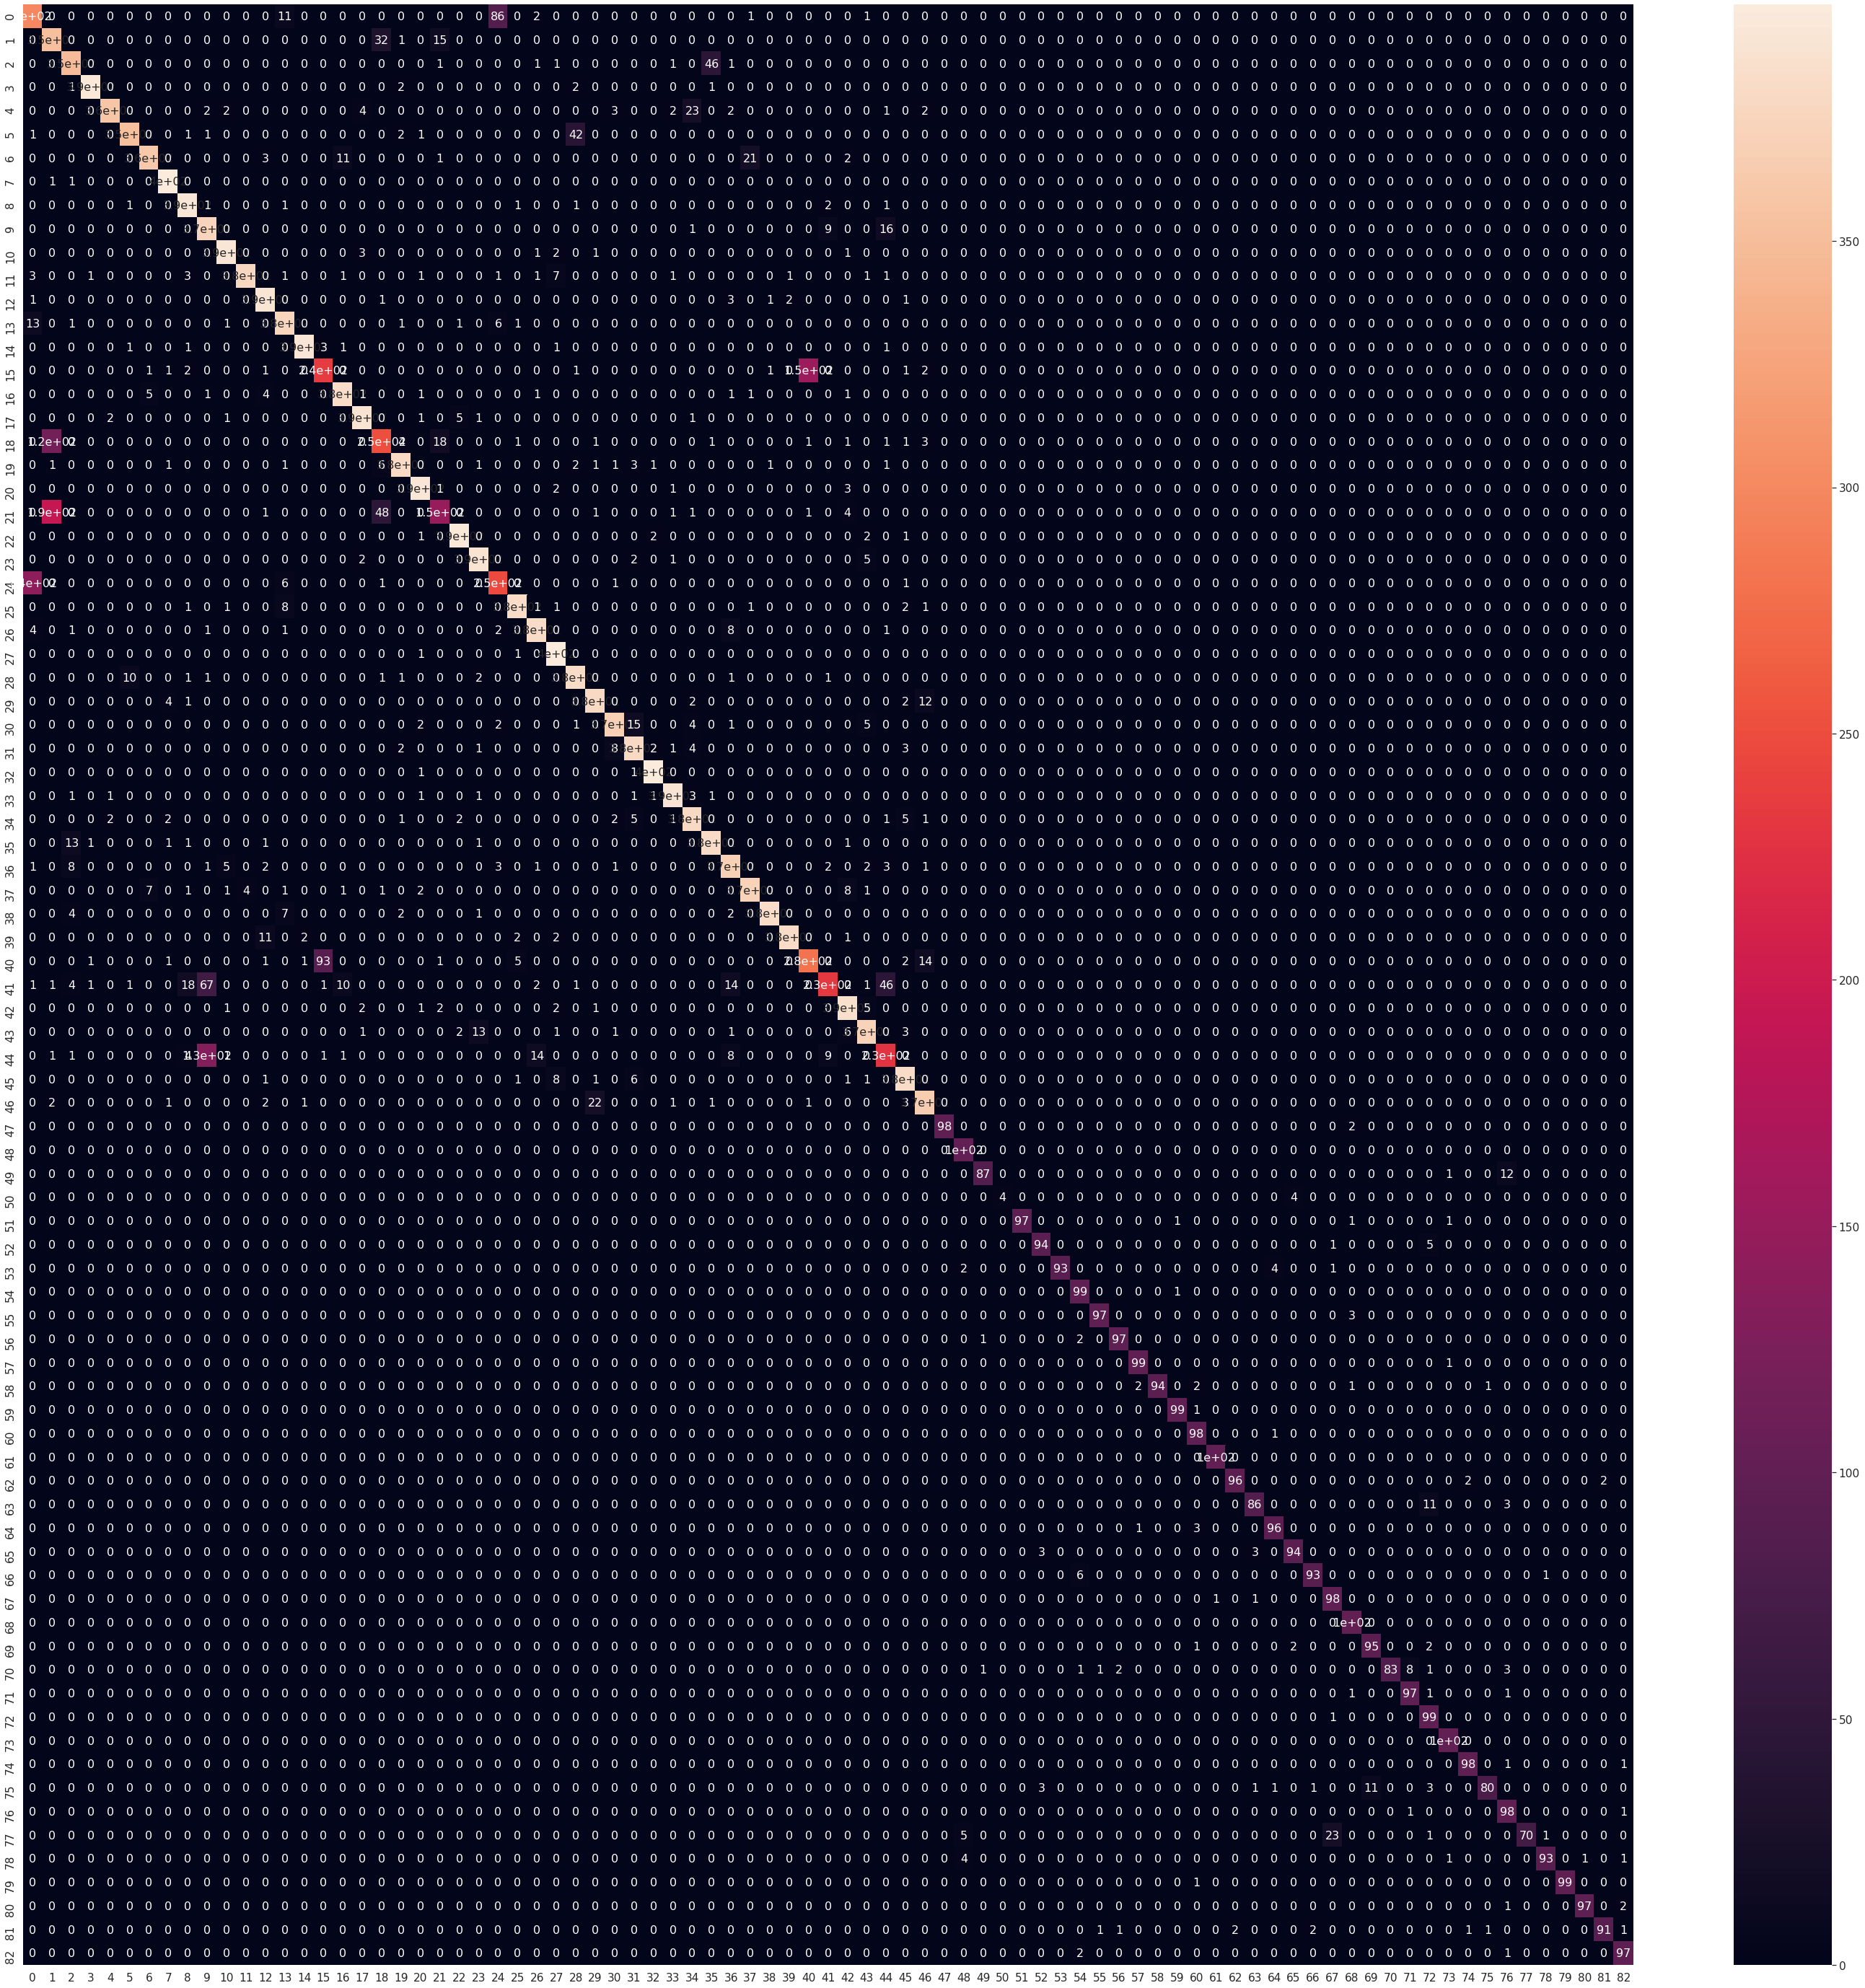

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(83),
                  range(83))
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

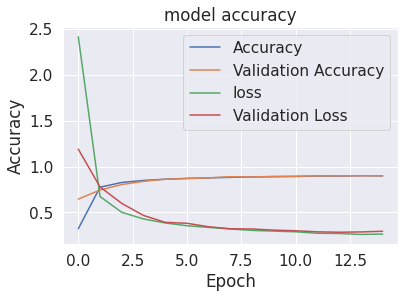

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing import image
img = image.load_img("a1-(1).jpg",target_size=(28,28))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("vgg16_1.h5")

for i in range(6):
    output = saved_model.predict(img)
    print(output[0][i])


FileNotFoundError: ignored

New 19 Layers


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="same", activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


# model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                #  input_shape=(28, 28,1)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(4,4), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(4,4), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(4,4), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(4,4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
# model.add(Dense(units=784,activation="relu"))
model.add(Dense(units=784,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(83, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_test, y_test))

Train on 119814 samples, validate on 25814 samples
Epoch 1/15
119814/119814 [==============================] - 3274s 27ms/step - loss: 3.9729 - accuracy: 0.0214 - val_loss: 3.7848 - val_accuracy: 0.0232
Epoch 2/15
119814/119814 [==============================] - 3222s 27ms/step - loss: 3.8534 - accuracy: 0.0209 - val_loss: 3.7826 - val_accuracy: 0.0232
Epoch 3/15
119814/119814 [==============================] - 3251s 27ms/step - loss: 3.8465 - accuracy: 0.0213 - val_loss: 3.7787 - val_accuracy: 0.0232
Epoch 4/15
  8192/119814 [=>............................] - ETA: 48:27 - loss: 3.8456 - accuracy: 0.0227

KeyboardInterrupt: ignored

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
epochs = range(15)
import sklearn.metrics.accuracy_score #error

ModuleNotFoundError: ignored

In [ ]:
# Accuracy curve
plotgraph(epochs, accuracy, val_acc)

NameError: ignored

In [ ]:
# loss curve
plotgraph(epochs, loss, val_loss)

NameError: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2940183438627642
Test accuracy: 0.9018245339393616


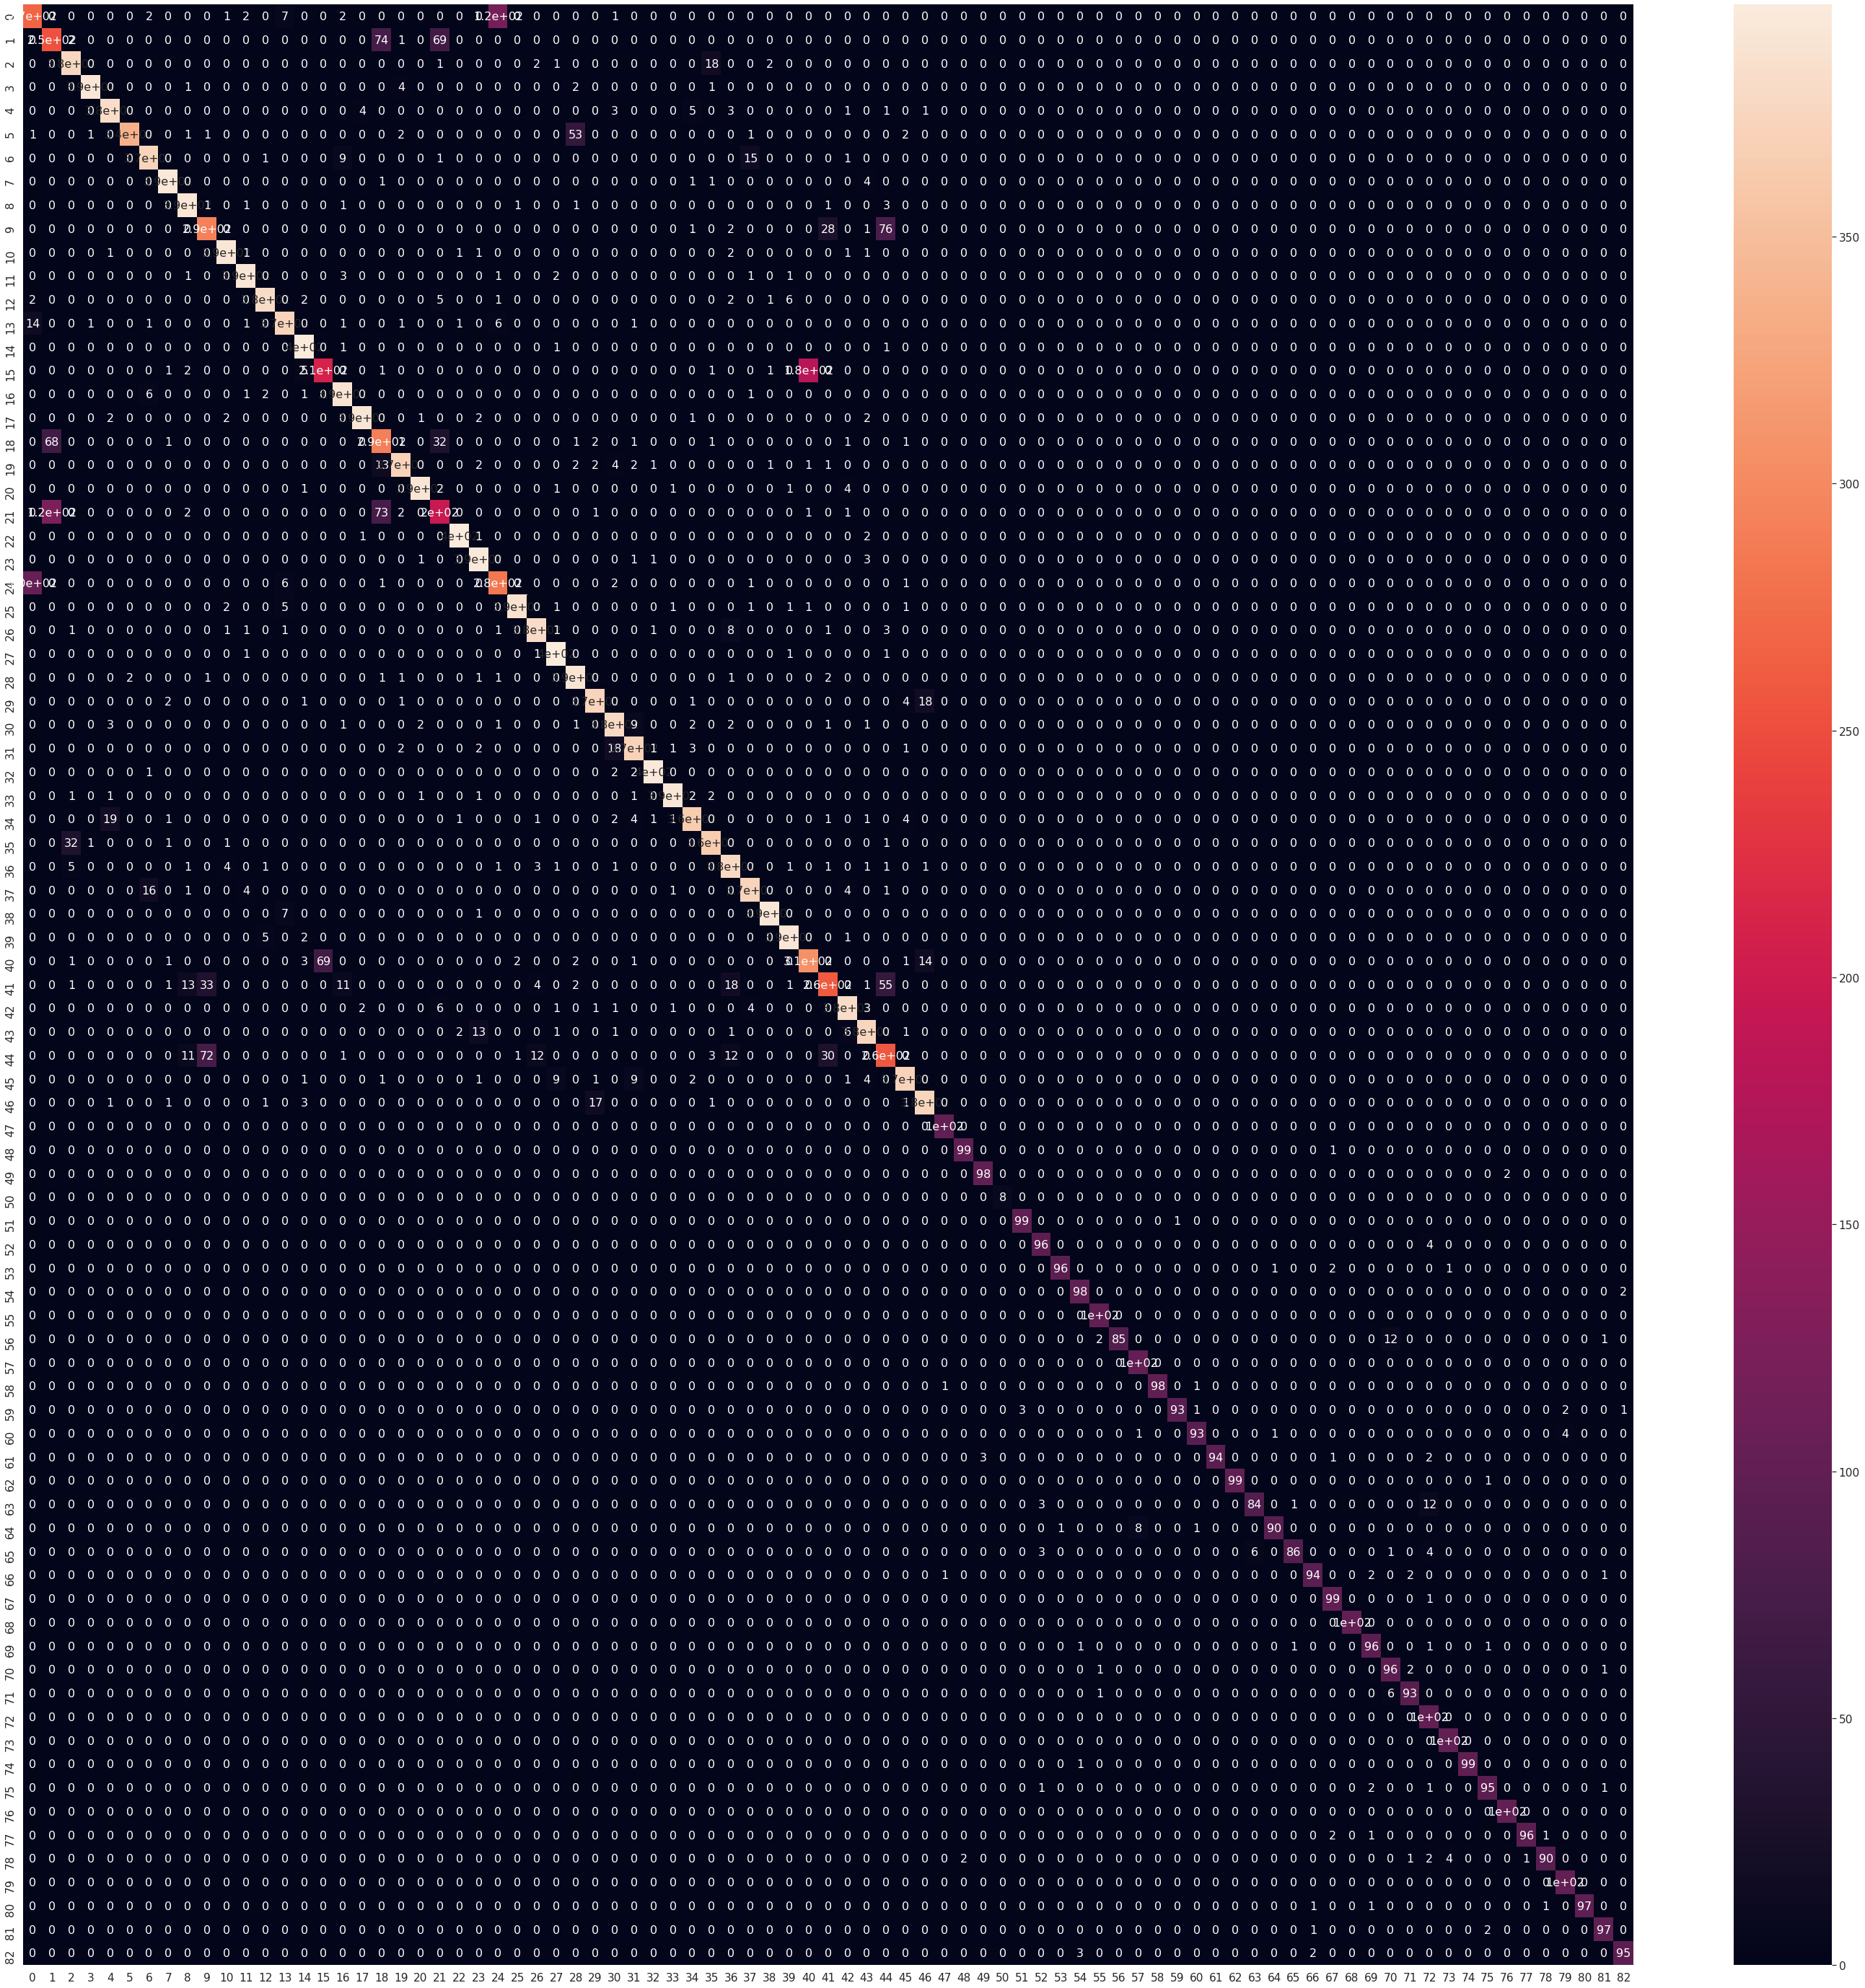

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(83),
                  range(83))
plt.figure(figsize = (50,50))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

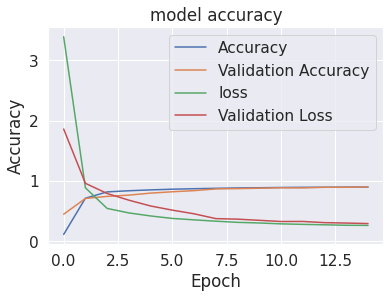

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()